In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\user\AppData\Local\Temp\ipykernel_16476\327208007.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter='|')
C:\Users\user\AppData\Local\Temp\ipykernel_16476\327208007.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


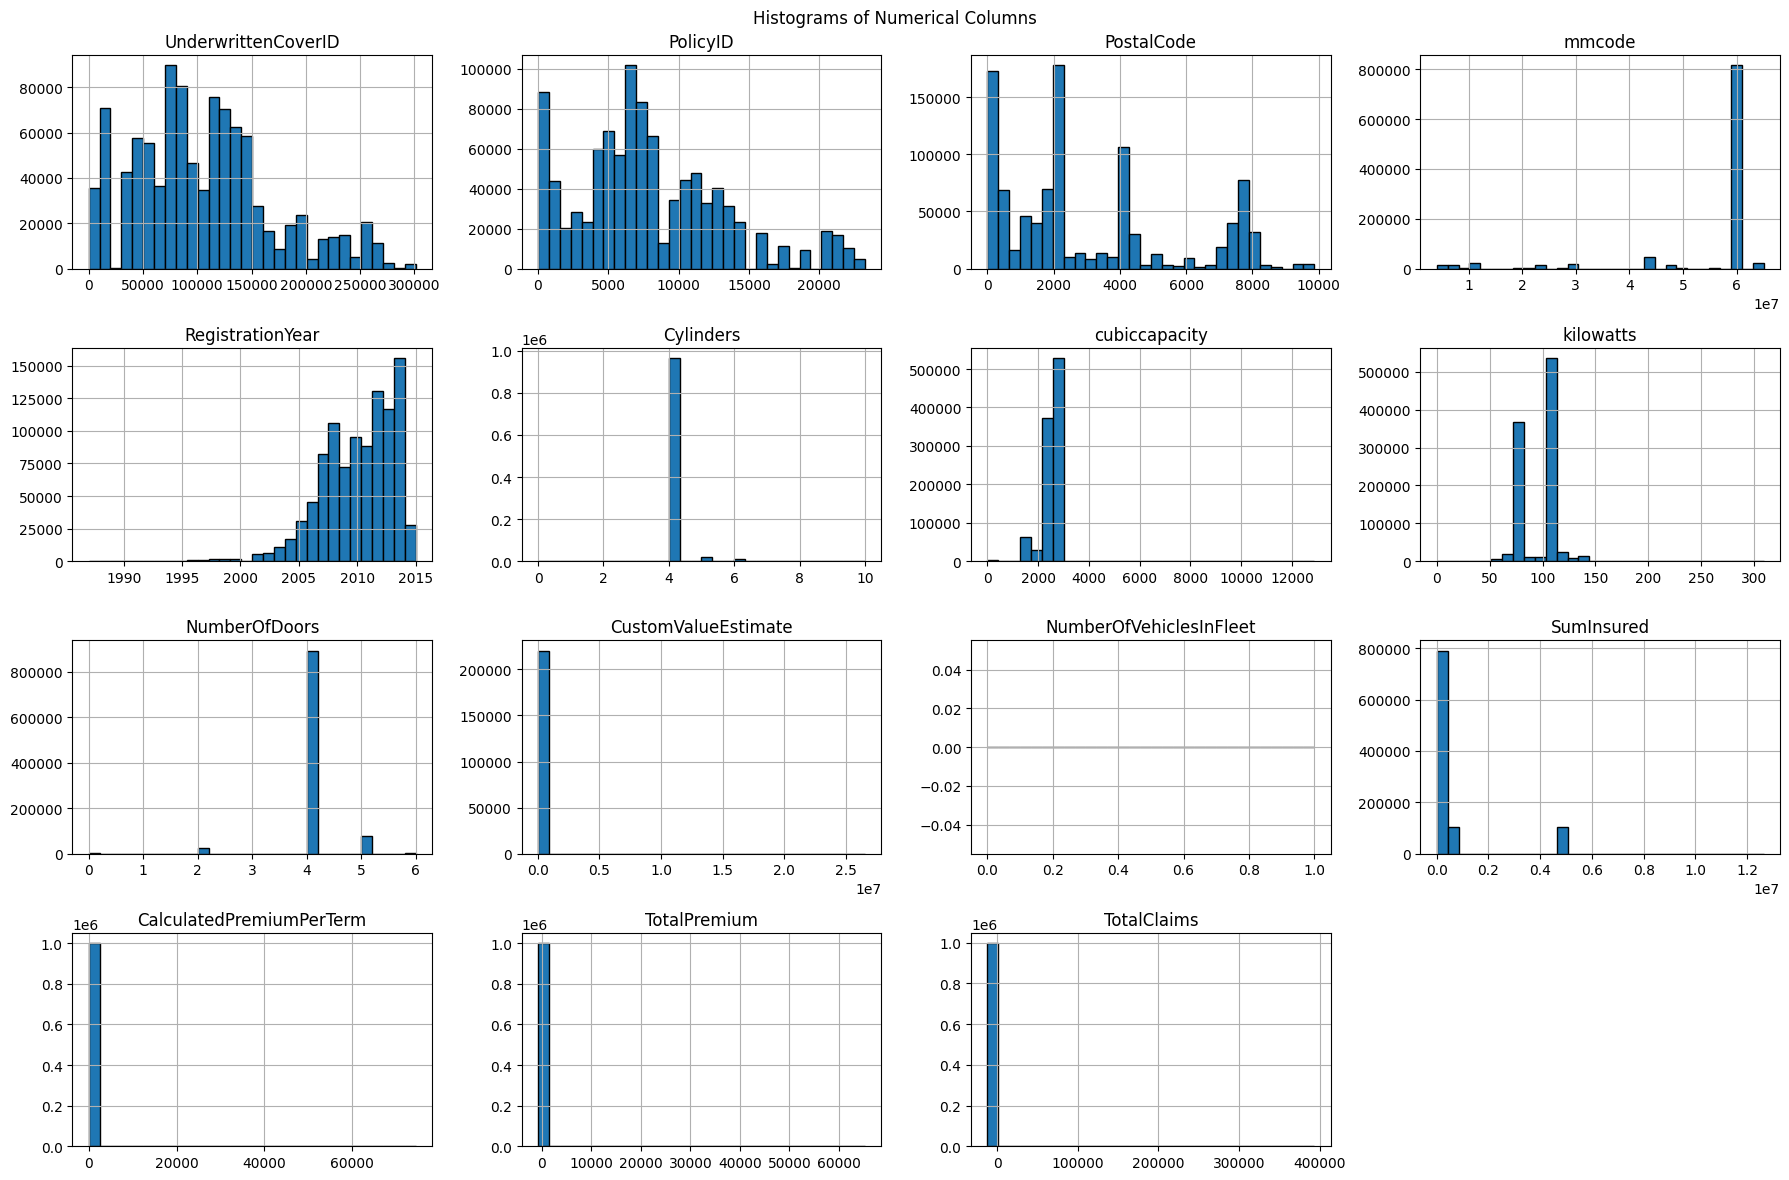

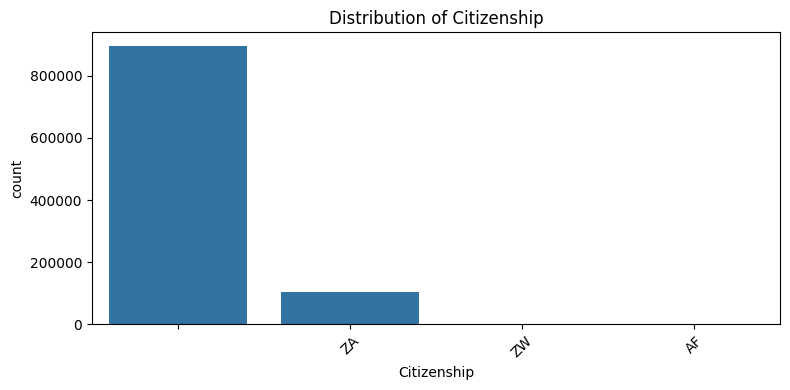

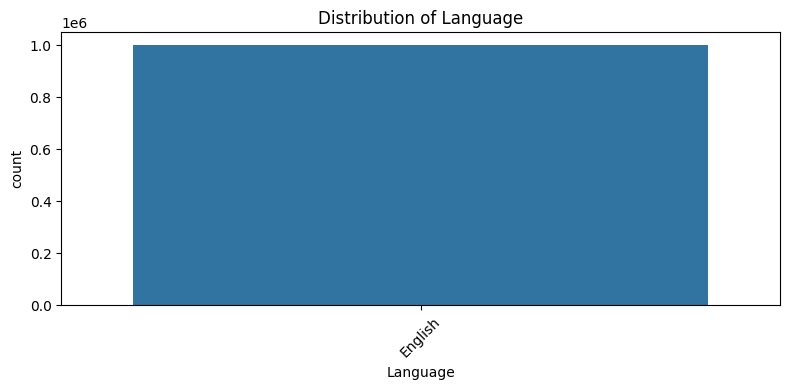

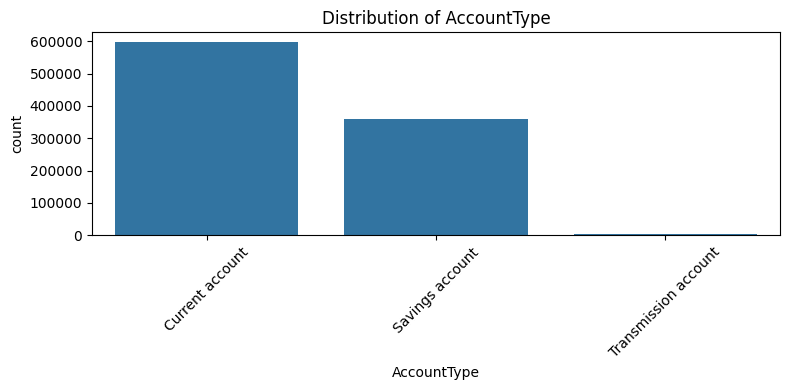

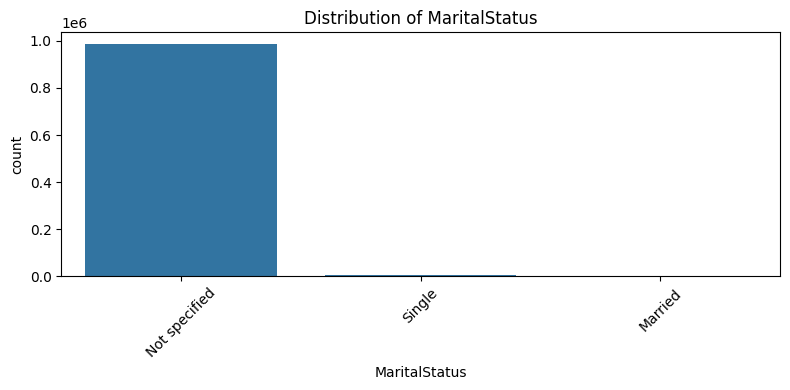

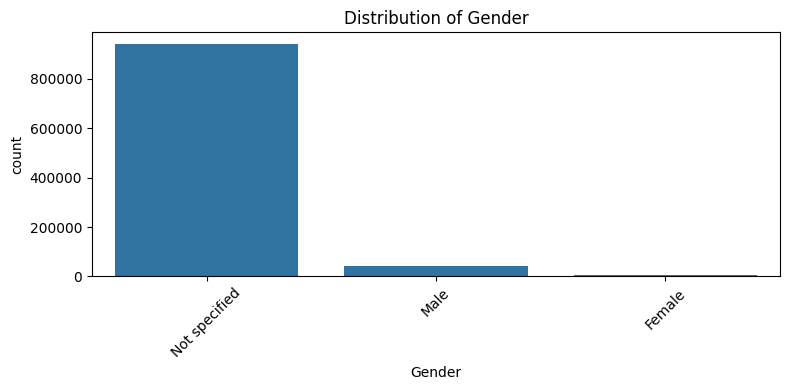

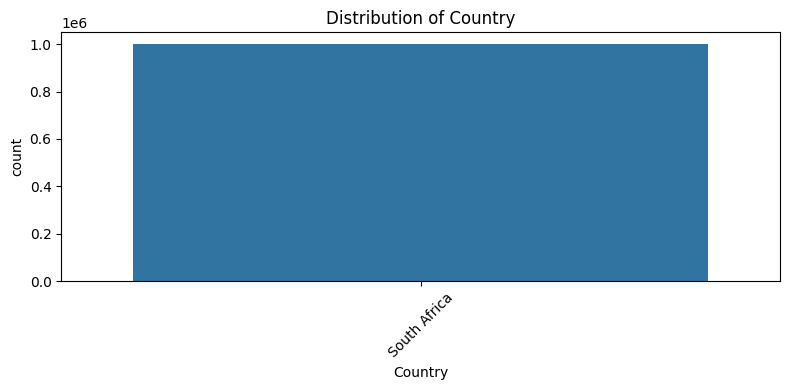

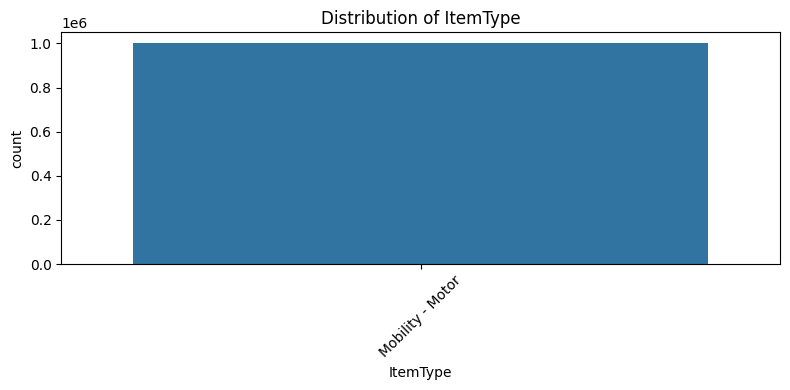

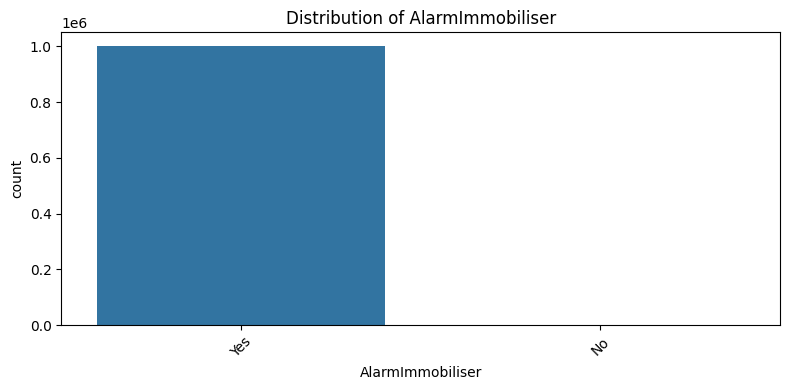

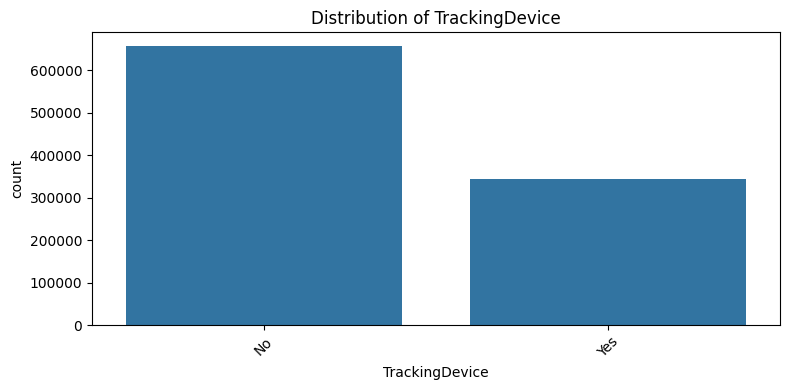

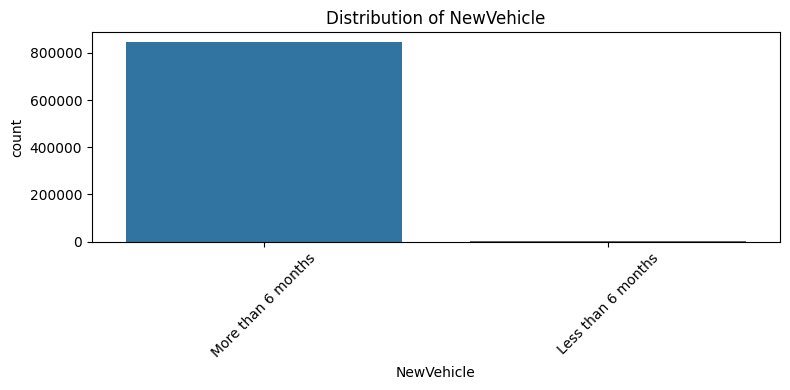

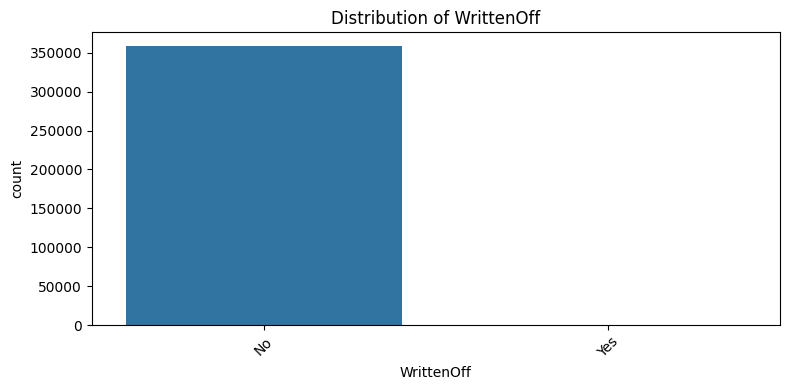

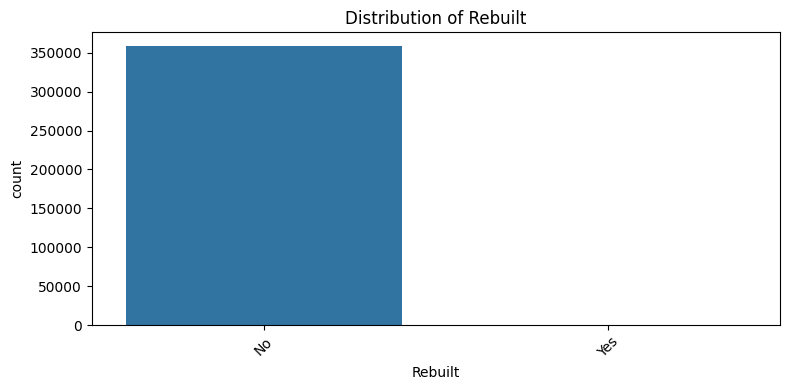

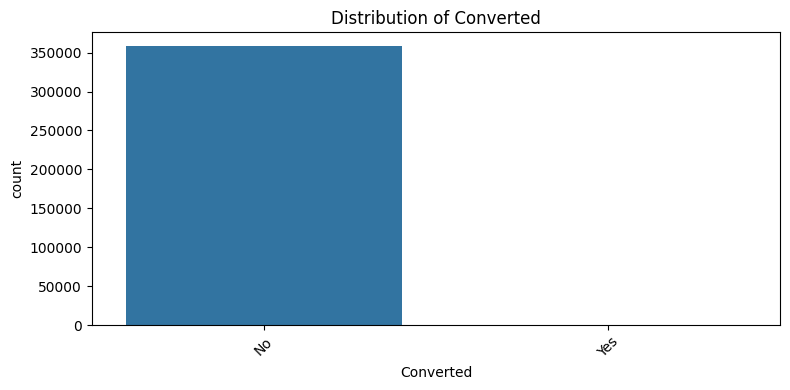

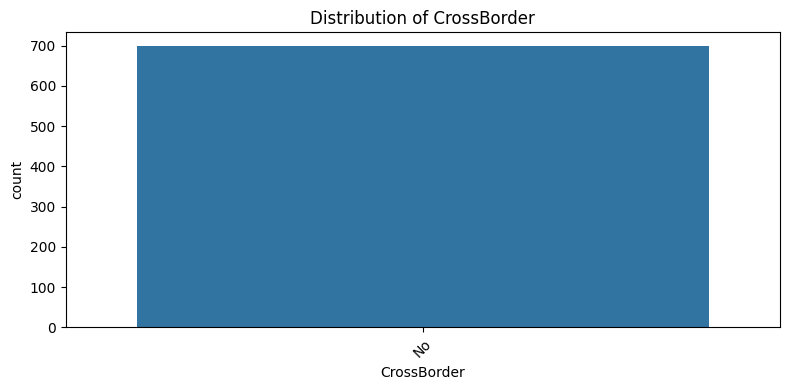

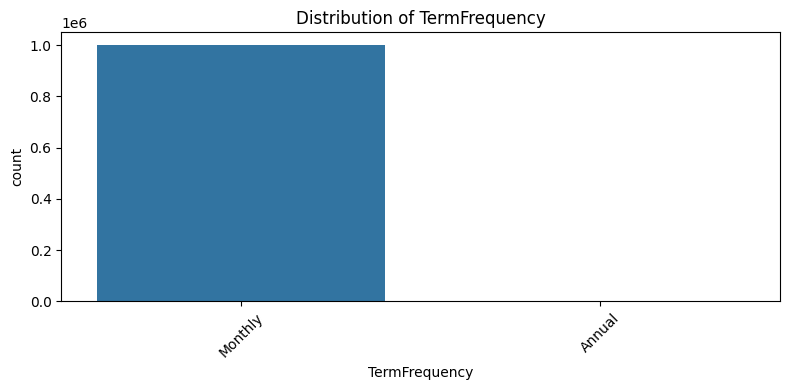

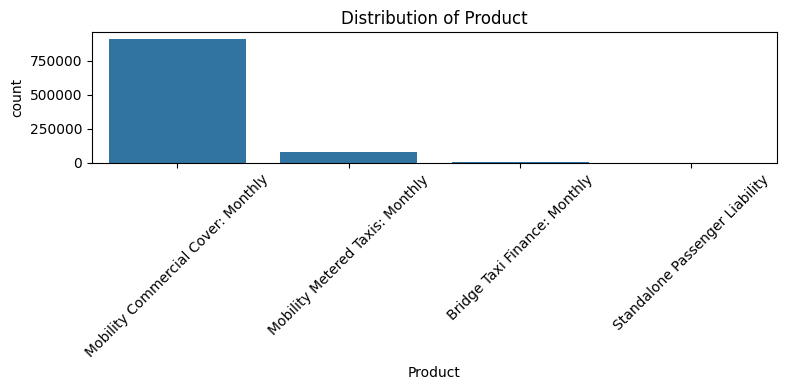

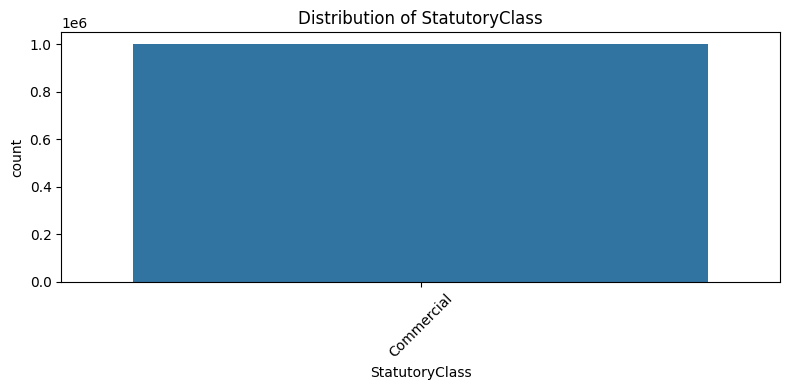

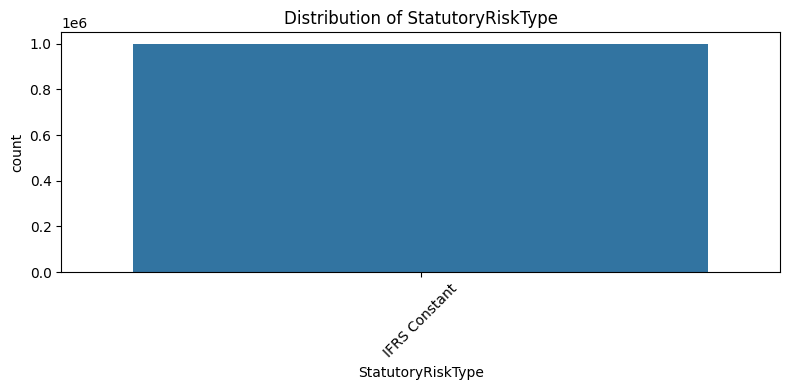

In [6]:
# Load data with proper type conversion
def load_data(filepath: str) -> pd.DataFrame:
    df = pd.read_csv(filepath, delimiter='|')
    
    # Try converting all columns to numeric where possible
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    
    return df

# Plot histograms for numerical features with fallback
def plot_numeric_histograms(df: pd.DataFrame):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) == 0:
        print("No numerical columns found for histogram plotting.")
        return
    df[num_cols].hist(bins=30, figsize=(18, 12), edgecolor='black')
    plt.suptitle('Histograms of Numerical Columns')
    plt.tight_layout()
    plt.show()

# Bar plots for top categorical features
def plot_categorical_counts(df: pd.DataFrame, top_n=5):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        if df[col].nunique() <= 4:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col, order=df[col].value_counts().index)
            plt.title(f"Distribution of {col}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Run functions
if __name__ == "__main__":
    filepath = "../data/MachineLearningRating_v3.txt"
    df = load_data(filepath)
    plot_numeric_histograms(df)
    plot_categorical_counts(df)
